In [ ]:
zip_path = '/content/drive/My\ Drive/Datasets/santa-dataset.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

# !rm /content/santa-dataset.zip

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from keras.layers import LeakyReLU
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import Dropout


from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [ ]:
model = Sequential()
vgg_conv = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in vgg_conv.layers[:]:
  layer.trainable = False

model.add(vgg_conv)

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

opt = SGD(lr=0.001, momentum=0.9)
# opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               12845568  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 27,560,769
Trainable params: 12,846,081
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
dataset_dir = '/content/santa-dataset'

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_aug_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=60, target_size=(224, 224))
test_aug_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=60, target_size=(224, 224))

# train_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
# test_iterator = datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [ ]:
history_base_model = model.fit_generator(train_aug_iterator, steps_per_epoch=len(train_aug_iterator), validation_data=test_aug_iterator, validation_steps=len(test_aug_iterator), epochs=75)

Epoch 1/75
12/12 [==============================] - 29s 2s/step - loss: 1.3299 - accuracy: 0.5015 - val_loss: 0.7608 - val_accuracy: 0.5077
Epoch 2/75
12/12 [==============================] - 24s 2s/step - loss: 0.6120 - accuracy: 0.6707 - val_loss: 0.3677 - val_accuracy: 0.8385
Epoch 3/75
12/12 [==============================] - 26s 2s/step - loss: 0.3474 - accuracy: 0.8761 - val_loss: 0.2518 - val_accuracy: 0.9346
Epoch 4/75
12/12 [==============================] - 24s 2s/step - loss: 0.3012 - accuracy: 0.8761 - val_loss: 0.2718 - val_accuracy: 0.9038
Epoch 5/75
12/12 [==============================] - 23s 2s/step - loss: 0.2839 - accuracy: 0.8716 - val_loss: 0.2184 - val_accuracy: 0.9231
Epoch 6/75
12/12 [==============================] - 24s 2s/step - loss: 0.2217 - accuracy: 0.9199 - val_loss: 0.2005 - val_accuracy: 0.9308
Epoch 7/75
12/12 [==============================] - 24s 2s/step - loss: 0.3371 - accuracy: 0.8459 - val_loss: 0.2020 - val_accuracy: 0.9385
Epoch 8/75
12/12 [==

In [ ]:
history_df = pd.DataFrame(history_base_model.history)
history_df['epoch'] = history_base_model.epoch
history_df

,loss,accuracy,val_loss,val_accuracy,epoch
0,1.329908,0.501511,0.760821,0.507692,0
1,0.611955,0.670695,0.367719,0.838462,1
2,0.347390,0.876133,0.251814,0.934615,2
3,0.301201,0.876133,0.271771,0.903846,3
4,0.283929,0.871601,0.218405,0.923077,4
...,...,...,...,...,...
70,0.110310,0.954683,0.124512,0.961538,70
71,0.070527,0.981873,0.135757,0.950000,71
72,0.073546,0.977341,0.112419,0.969231,72
73,0.058172,0.978852,0.131485,0.953846,73


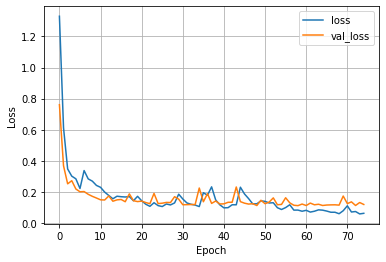

In [ ]:
plot_loss(history_base_model)

Hasil terbaik model ini

---

Epoch 59/75 [==============================] - 24s 2s/step - loss: 0.0828 - accuracy: 0.9743 - val_loss: 0.1115 - val_accuracy: 0.9692